<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#개요" data-toc-modified-id="개요-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>개요</a></span><ul class="toc-item"><li><span><a href="#데이터" data-toc-modified-id="데이터-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터</a></span></li></ul></li><li><span><a href="#제출예시" data-toc-modified-id="제출예시-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>제출예시</a></span></li></ul></div>

# 개요
데이콘 베이직 Basic | 정형 | Accuracy
- 상금 : 참가시 최소 50 XP, 특별상 데이콘 후드
- 2022.04.18 ~ 2022.04.29 18:0
https://dacon.io/competitions/official/235892/data

## 예

## 데이터
1. train.csv : 학습 데이터

- id : 샘플 아이디
- age : 나이
- workclass : 일 유형
- fnlwgt : CPS(Current Population Survey) 가중치
- education : 교육수준
- education.num : 교육수준 번호
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적
- target : 소득



2. test.csv : 테스트 데이터

- id : 샘플 아이디
- age : 나이
- workclass : 일 유형
- fnlwgt : CPS(Current Population Survey) 가중치
- education : 교육수준
- education.num : 교육수준 번호
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적



3. sample_submission.csv : 제출 양식

- id : 샘플 아이디
- target : 소득

In [ ]:
import pandas as pd
df = pd.read_csv('./dacon/train.csv')
df.head(3)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


In [ ]:
df.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [ ]:
df.describe(include='all') 
#education = education.num이므로 education 제거 (서열척도로 봐도 됨)
#id = index 이므로 제거
df = df.drop(['education', 'id'], axis=1)
df['workclass'].value_counts()

Private             11568
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17480 non-null  int64 
 1   workclass       15644 non-null  object
 2   fnlwgt          17480 non-null  int64 
 3   education.num   17480 non-null  int64 
 4   marital.status  17480 non-null  object
 5   occupation      15637 non-null  object
 6   relationship    17480 non-null  object
 7   race            17480 non-null  object
 8   sex             17480 non-null  object
 9   capital.gain    17480 non-null  int64 
 10  capital.loss    17480 non-null  int64 
 11  hours.per.week  17480 non-null  int64 
 12  native.country  16897 non-null  object
 13  target          17480 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.9+ MB


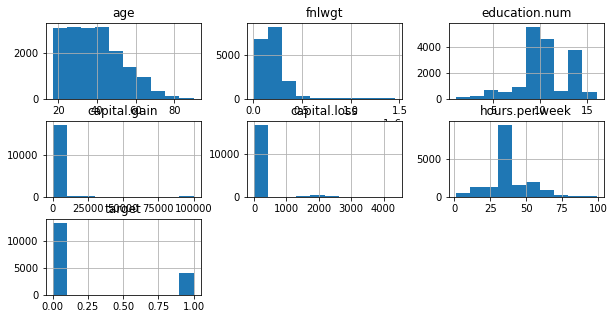

In [ ]:
# feature scaling으로 수치형 feature들의 강제 정규화 (yeo-johnson)
from matplotlib import pyplot as plt
df.hist()
plt.show()

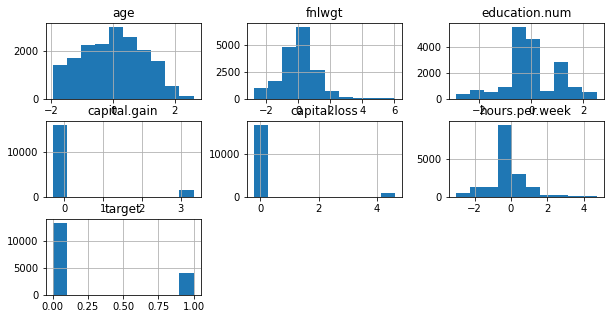

In [ ]:
from sklearn.preprocessing import PowerTransformer
ndf = df.copy()
for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    data = np.array(ndf[col]).reshape(-1,1)
    pt = PowerTransformer(method='yeo-johnson')
    ndf[col] = pt.fit_transform(data)

ndf.hist()
plt.show()

In [ ]:
#범주형: workclass, marital.status, occupation, relationship, race, sex, native.country
ndf.nunique()

age                  73
workclass             8
fnlwgt            13580
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        111
capital.loss         82
hours.per.week       90
native.country       41
target                2
dtype: int64

In [ ]:
#random sampling
df2 = ndf.sample(5000)
df2['target'].value_counts() #1이 적은 불균형 클래스 자료

0    3830
1    1170
Name: target, dtype: int64

In [ ]:
#oversampling
X = df2.drop('target', axis=1)
y = df2['target']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
Xr, yr = ros.fit_resample(X, y)
yr.value_counts()

0    3830
1    3830
Name: target, dtype: int64

In [ ]:
from pandas import DataFrame, merge
import numpy as np
Xr = DataFrame(Xr, columns=X.columns)
yr = DataFrame(yr, columns=['target'])
df2 = merge(Xr, yr, right_index=True, left_index=True)
df2.describe(include='all')
#이상치 예측: capital.gain, hours.per.week
#결측치: workclass, occupation, native.country(모두 범주형 변수)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
count,7660.000000,7052,7660.000000,7660.000000,7660,7048,7660,7660,7660,7660.000000,7660.000000,7660.000000,7403,7660.000000
unique,NaN,8,NaN,NaN,7,14,6,5,2,NaN,NaN,NaN,39,NaN
top,NaN,Private,NaN,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,4948,NaN,NaN,4510,1235,3944,6579,5585,NaN,NaN,NaN,6759,NaN
mean,0.161155,NaN,0.007624,0.246945,NaN,NaN,NaN,NaN,NaN,0.152113,0.131278,0.164506,NaN,0.500000
std,0.927518,NaN,0.992802,1.040371,NaN,NaN,NaN,NaN,NaN,1.199390,1.249644,1.014513,NaN,0.500033
min,-1.962722,NaN,-2.484807,-2.896856,NaN,NaN,NaN,NaN,NaN,-0.299966,-0.216262,-3.040283,NaN,0.000000
25%,-0.443993,NaN,-0.573475,-0.446302,NaN,NaN,NaN,NaN,NaN,-0.299966,-0.216262,-0.003088,NaN,0.000000
50%,0.244117,NaN,0.045656,-0.061207,NaN,NaN,NaN,NaN,NaN,-0.299966,-0.216262,-0.003088,NaN,0.500000
75%,0.867742,NaN,0.566817,1.171371,NaN,NaN,NaN,NaN,NaN,-0.299966,-0.216262,0.788598,NaN,1.000000


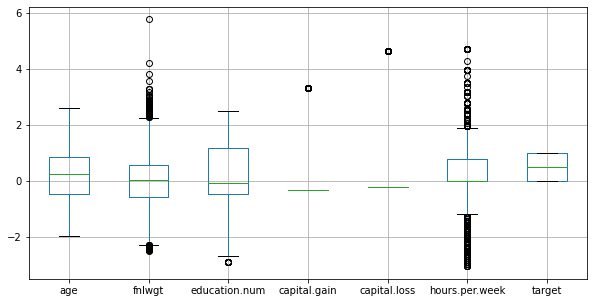

In [ ]:
# 이상치 조정: 수치형 변수에 한함
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
df2.boxplot()
plt.show()

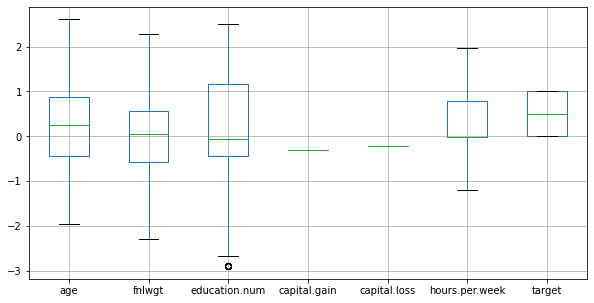

In [ ]:
#education.num은 문제 없는 것으로 보고 남겨두기로 함
df3 = df2.copy()
for col in ['fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']:
    IQR = df2[col].quantile(0.75) - df2[col].quantile(0.25)
    top = df2[col].quantile(0.75) + IQR * 1.5
    down = df2[col].quantile(0.25) - IQR * 1.5
    df3[col] = df3[col].clip(top, down)

df3.boxplot()
plt.show()

In [ ]:
# 결측치 확인
df3.isna().sum()

age                 0
workclass         608
fnlwgt              0
education.num       0
marital.status      0
occupation        612
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    257
target              0
dtype: int64

In [ ]:
# 가변수화 - 범주형 변수 only! 결측치가 없어진 효과
from pandas import get_dummies
df4 = get_dummies(df3, drop_first=True)
df4.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.867742,-2.283912,1.605917,-0.299966,-0.216262,-0.003088,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.444063,0.650885,-0.446302,-0.299966,-0.216262,-0.003088,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.867742,-0.172936,2.051445,-0.299966,-0.216262,0.788598,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7660 entries, 0 to 7659
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   7660 non-null   float64
 1   fnlwgt                                7660 non-null   float64
 2   education.num                         7660 non-null   float64
 3   capital.gain                          7660 non-null   float64
 4   capital.loss                          7660 non-null   float64
 5   hours.per.week                        7660 non-null   float64
 6   target                                7660 non-null   int64  
 7   workclass_Local-gov                   7660 non-null   uint8  
 8   workclass_Never-worked                7660 non-null   uint8  
 9   workclass_Private                     7660 non-null   uint8  
 10  workclass_Self-emp-inc                7660 non-null   uint8  
 11  workclass_Self-em

In [ ]:
X = df4.drop('target', axis=1)
y = df4['target']

# feature selection - vif
def check_vif(X, y):
    from pandas import DataFrame
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = DataFrame(columns=['feature', 'VIF'])
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i, 'feature'] = model.exog_names[i]
        vif_df.loc[i, 'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=True)

vif_feat= check_vif(X, y)
vif_feat = vif_feat.query("VIF <= 10")['feature'].values
Xv = X.loc[:, vif_feat]
Xv

,capital.gain,capital.loss,occupation_Armed-Forces,native.country_Honduras,workclass_Never-worked,workclass_Without-pay,native.country_Scotland,native.country_Portugal,native.country_Hungary,native.country_Trinadad&Tobago,...,occupation_Craft-repair,workclass_Self-emp-not-inc,sex_Male,occupation_Exec-managerial,occupation_Prof-specialty,relationship_Other-relative,marital.status_Never-married,native.country_United-States,workclass_Private,race_Asian-Pac-Islander
0,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7656,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
7657,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
7658,-0.299966,-0.216262,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6, n_estimators=100, oob_score=True)
rf.fit(Xv, y)
print(rf.score(Xv, y), rf.oob_score_)

0.8129242819843342 0.7911227154046997


In [ ]:
features = DataFrame({"importance": rf.feature_importances_, "feature": list(Xv.columns)}).sort_values(by='importance', ascending=False).head(50)['feature'].values

In [ ]:
Xv2 = Xv.loc[:, features]

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(Xv2, y)
LR.score(Xv2, y)

0.7972584856396867

In [ ]:
rf2 = RandomForestClassifier(max_depth=6, n_estimators=100, oob_score=True)
rf2.fit(Xv2, y)
print(rf2.score(Xv2, y), rf2.oob_score_)

0.8092689295039165 0.7976501305483029


# 제출예시

In [ ]:
test = pd.read_csv('./dacon/test.csv')
test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,15024,0,40,United-States
15077,15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
15078,15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
15079,15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States


In [ ]:
# feature 삭제
test = test.drop(['education', 'id'], axis=1)

# feature scaling으로 수치형 feature들의 강제 정규화 (yeo-johnson)
test2 = test.copy()
for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    data = np.array(test[col]).reshape(-1,1)
    pt = PowerTransformer(method='yeo-johnson')
    test2[col] = pt.fit_transform(data)
    
# 이상치 조정
test3 = test2.copy()
for col in ['fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']:
    IQR = test3[col].quantile(0.75) - test3[col].quantile(0.25)
    top = test3[col].quantile(0.75) + IQR * 1.5
    down = test3[col].quantile(0.25) - IQR * 1.5
    test3[col] = test3[col].clip(top, down)
    
# 가변수화 - 범주형 변수 only! 결측치가 없어진 효과
from pandas import get_dummies
test4 = get_dummies(test3, drop_first=True)
test4.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.733781,1.098397,-0.092081,-0.303112,-0.226834,0.344224,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.218270,-0.190639,-0.092081,-0.303112,-0.226834,0.970432,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.477633,-0.147566,1.157378,-0.303112,-0.226834,-0.073249,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#LR - 0.77까지 나옴
test5 = test4.loc[:, features]
testy = LR.predict(test5)
LR.score(test5, testy)

1.0

In [ ]:
#RF
test5 = test4.loc[:, features]
testy = rf2.predict(test5)
rf2.score(test5, testy)

1.0

In [ ]:
# 결과 제출
DataFrame(testy).reset_index().rename(columns={'index':'id', 0:'target'}).to_csv('sample_submission.csv', index=False)